# Customizing Seaborn Plots

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/FY18_4050_FMRs.csv')

In [3]:
df.head()

,fips2010,fmr_0,fmr_1,fmr_2,fmr_3,fmr_4,state,metro_code,areaname,county,cousub,countyname,county_town_name,pop2010,acs_2017_2,state_alpha,fmr_type,metro,fmr_pct_chg,fmr_dollar_chg
0,100199999,588,691,829,1055,1451,1,METRO33860M33860,"Montgomery, AL MSA",1,99999,Autauga County,Autauga County,54571.0,822,AL,40,1,0.008516,7
1,100399999,729,762,879,1280,1471,1,METRO19300M19300,"Daphne-Fairhope-Foley, AL MSA",3,99999,Baldwin County,Baldwin County,182265.0,977,AL,40,1,-0.100307,-98
2,100599999,491,494,657,824,929,1,NCNTY01005N01005,"Barbour County, AL",5,99999,Barbour County,Barbour County,27457.0,671,AL,40,0,-0.020864,-14
3,100799999,692,768,882,1176,1315,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",7,99999,Bibb County,Bibb County,22915.0,866,AL,40,1,0.018476,16
4,100999999,692,768,882,1176,1315,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",9,99999,Blount County,Blount County,57322.0,866,AL,40,1,0.018476,16


## Setting the default style

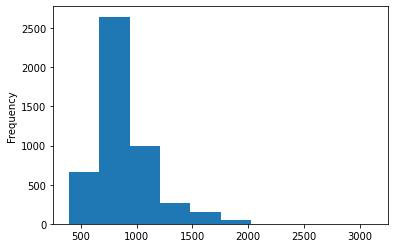

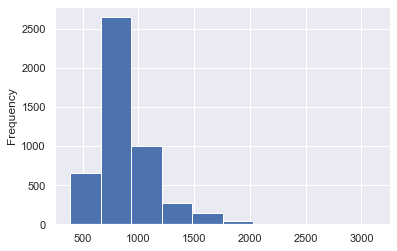

<Figure size 432x288 with 0 Axes>

In [4]:
# Plot the pandas histogram
df['fmr_2'].plot.hist()
plt.show()
plt.clf()

# Set the default seaborn style
sns.set() # Set aesthetic parameters in one step.

# Plot the pandas histogram again
df['fmr_2'].plot.hist()
plt.show()
plt.clf()

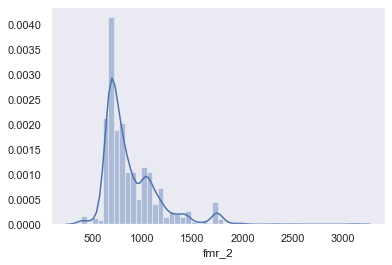

<Figure size 432x288 with 0 Axes>

In [5]:
sns.set_style('dark')
sns.distplot(df['fmr_2'])
plt.show()
plt.clf()

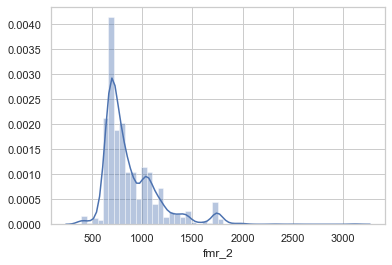

<Figure size 432x288 with 0 Axes>

In [6]:
sns.set_style('whitegrid')
sns.distplot(df['fmr_2'])
plt.show()
plt.clf()

## Despining

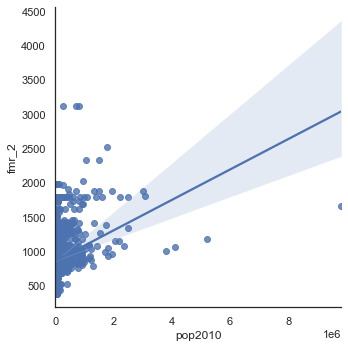

<Figure size 432x288 with 0 Axes>

In [7]:
# Set the style to white
sns.set_style('white')

# Create a regression plot
sns.lmplot(data=df,
           x='pop2010',
           y='fmr_2')

# Remove the spines
sns.despine(top=True,right=True)

# Show the plot and clear the figure
plt.show()
plt.clf()

## Matplotlib color codes

Seaborn offers several options for modifying the colors of your visualizations. The simplest approach is to explicitly state the color of the plot. A quick way to change colors is to use the standard matplotlib color codes.

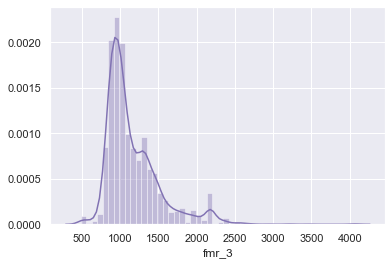

In [8]:
# Set style, enable color code, and create a magenta distplot
sns.set(color_codes=True)
sns.distplot(df['fmr_3'], color='m')

# Show the plot
plt.show()

## Using default palettes
Seaborn includes several default palettes that can be easily applied to your plots.

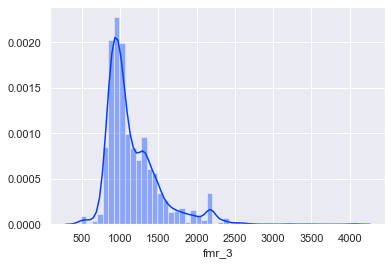

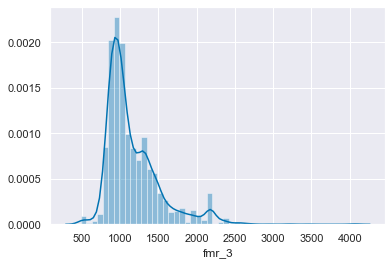

<Figure size 432x288 with 0 Axes>

In [9]:
# Loop through differences between bright and colorblind palettes
for p in ['bright', 'colorblind']:
    sns.set_palette(p) # Set the matplotlib color cycle using a seaborn palette.
    sns.distplot(df['fmr_3'])
    plt.show()
    
    # Clear the plots    
    plt.clf()

## Creating Custom Palettes

Seaborn provides the `color_palette()` function to create your own custom sequential, categorical, or diverging palettes. Types:
1. Circular colors = when the data is not ordered
2. Diverging colors = when both the low and high values are interesting
3. Sequential colors = when the data has a consistent range from high to low

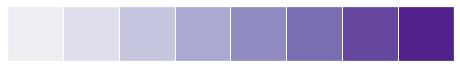

In [10]:
# Create and display a Purples sequential palette containing 8 colors.
sns.palplot(sns.color_palette('Purples', 8))

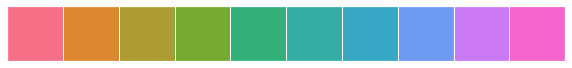

In [11]:
# Create and display a palette with 10 colors using the husl system.
sns.palplot(sns.color_palette('husl', 10))
plt.show()

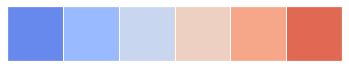

In [12]:
# Create and display a palette with 10 colors using the husl system.
sns.palplot(sns.color_palette('coolwarm', 6))
plt.show()

## Customizing with matplotlib

Seaborn uses matplotlib as the underlying library for creating plots. Most of the time, you can use the Seaborn API to modify your visualizations but sometimes it is helpful to use matplotlib's functions to customize your plots. The most important object in this case is matplotlib's `axes`.

Once you have an axes object, you can perform a lot of customization of your plot.

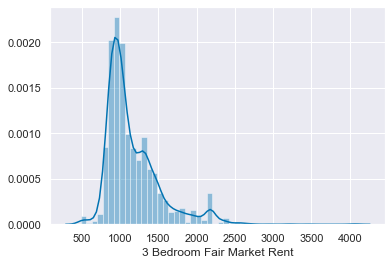

In [13]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of data
sns.distplot(df['fmr_3'], ax=ax)

# Create a more descriptive x axis label
ax.set(xlabel="3 Bedroom Fair Market Rent")

# Show the plot
plt.show()

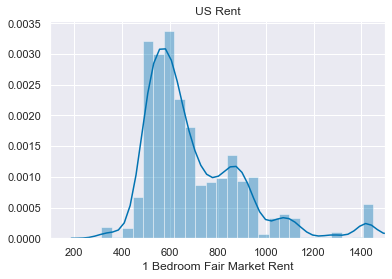

In [14]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of 1 bedroom rents
sns.distplot(df['fmr_1'], ax=ax)

# Modify the properties of the plot
ax.set(xlabel="1 Bedroom Fair Market Rent",
       xlim=(100,1500),
       title="US Rent")

# Display the plot
plt.show()

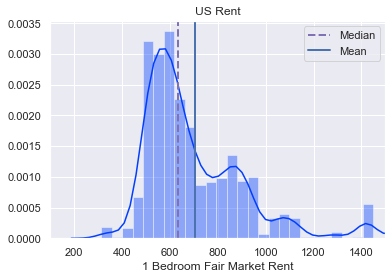

In [15]:
sns.set_palette('bright')
# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.distplot(df['fmr_1'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500), title="US Rent")

# Add vertical lines for the median and mean
ax.axvline(x=df['fmr_1'].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=df['fmr_1'].mean(), color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

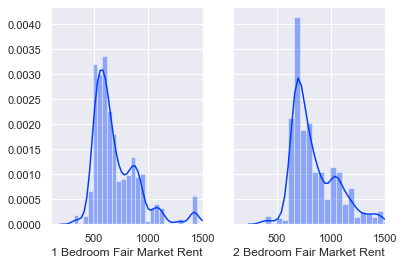

In [16]:
# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.distplot(df['fmr_1'], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.distplot(df['fmr_2'], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

# Display the plot
plt.show()

## References

1. https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
2. https://seaborn.pydata.org/generated/seaborn.set.html
3. https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python